<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Advanced Time Series Analysis</h1>
<h1>Pandas For Time Series</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

watermark  2.0.2
pandas     1.0.1
numpy      1.18.1
json       2.0.9
autopep8   1.5
matplotlib 3.1.3
Wed Aug 12 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 04f13a055d538383d7b5b7a03e7632fdd3a8c77f


Set the default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## DataFrames and Series

Series and DataFrames can be thought of as dictionaries associating keys to lists of values

In [4]:
data = {"id": [23, 42, 12, 86], "Name": ["Bob", "Karen", "Kate", "Bill"]}

In [7]:
data

['Bob', 'Karen', 'Kate', 'Bill']

A Series corresponds to just a sigle list of values

In [8]:
series = pd.Series(data["id"])

In [9]:
series

0    23
1    42
2    12
3    86
dtype: int64

While a DataFrame can have multiple

In [10]:
 df = pd.DataFrame(data)

In [11]:
df

,id,Name
0,23,Bob
1,42,Karen
2,12,Kate
3,86,Bill


Another way of looking at it, is that DataFrames are essentially groups of individual Series. Each Series can have it's own datatype **dtype**

In [12]:
df.dtypes

id       int64
Name    object
dtype: object

We can get general information about how the DataFrame is being stored by calling __info()__

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      int64 
 1   Name    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


Subsetting a DataFrame by column name we retrieve the underlying Series

In [16]:
type(df['id'])

pandas.core.series.Series

Both columns and index values have types and possibly names

In [17]:
df.columns

Index(['id', 'Name'], dtype='object')

In [18]:
df.index

RangeIndex(start=0, stop=4, step=1)

And we can query the shape and number of dimensions of the DataFrame easily

In [19]:
df.shape

(4, 2)

In [20]:
df.ndim

2

And relabel both index and column values

In [21]:
df.index = ["row" + str(i) for i in range(4)]
df.columns = ['ID', 'First Name']

In [22]:
df

,ID,First Name
row0,23,Bob
row1,42,Karen
row2,12,Kate
row3,86,Bill


## Subsetting

The top/bottom N number of values are easy to access

In [23]:
df.head(2)

,ID,First Name
row0,23,Bob
row1,42,Karen


In [24]:
df.tail(2)

,ID,First Name
row2,12,Kate
row3,86,Bill


As are individual columns, as we already saw above

In [25]:
df['ID']

row0    23
row1    42
row2    12
row3    86
Name: ID, dtype: int64

And individual rows, which can be indexed by Name

In [26]:
df.loc['row2']

ID              12
First Name    Kate
Name: row2, dtype: object

Or by position

In [23]:
df.iloc[2]

ID              12
First Name    Kate
Name: row2, dtype: object

Rows behave a named tuples, so you can access individual elements by position:

In [27]:
df.iloc[2, 0]

12

Or by name

In [28]:
df.iloc[2].ID

12

In [29]:
df.loc['row1', 'First Name']

'Karen'

Ranges can also be used with iloc

In [31]:
df.iloc[1:3]

,ID,First Name
row1,42,Karen
row2,12,Kate


And loc

One important difference is that loc automatically __includes__ the last value of the range, while iloc does not

In [33]:
df.loc["row1":"row3"]

,ID,First Name
row1,42,Karen
row2,12,Kate
row3,86,Bill


Since each column is just a numpy array, we can easily manipulate the values and create new columns

In [34]:
df['id2'] = df.ID+45

In [35]:
df

,ID,First Name,id2
row0,23,Bob,68
row1,42,Karen,87
row2,12,Kate,57
row3,86,Bill,131


We can also append new rows to the dataframe 

In [36]:
df.append([{"Name":"Bruno", "ID":15, "id2":30}])

,ID,First Name,id2,Name
row0,23,Bob,68,NaN
row1,42,Karen,87,NaN
row2,12,Kate,57,NaN
row3,86,Bill,131,NaN
0,15,NaN,30,Bruno


__append__ returns the modified version of the dataframe so you should assign it to a new variable if you wish to keep it

In [37]:
df

,ID,First Name,id2
row0,23,Bob,68
row1,42,Karen,87
row2,12,Kate,57
row3,86,Bill,131


To stack two dataframes on top of one another, we use __concat__

In [38]:
df2 = pd.concat([df, df])

In [39]:
df2

,ID,First Name,id2
row0,23,Bob,68
row1,42,Karen,87
row2,12,Kate,57
row3,86,Bill,131
row0,23,Bob,68
row1,42,Karen,87
row2,12,Kate,57
row3,86,Bill,131


__concat__ can also be used to place two DataFrames side by side

In [44]:
pd.concat([df, df], axis=1)

,ID,First Name,id2,ID,First Name,id2
row0,23,Bob,68,23,Bob,68
row1,42,Karen,87,42,Karen,87
row2,12,Kate,57,12,Kate,57
row3,86,Bill,131,86,Bill,131


In [46]:
df.drop('row2')

,ID,First Name,id2
row0,23,Bob,68
row1,42,Karen,87
row3,86,Bill,131


In [47]:
df

,ID,First Name,id2
row0,23,Bob,68
row1,42,Karen,87
row2,12,Kate,57
row3,86,Bill,131


In [48]:
df.drop('id2', axis=1)

,ID,First Name
row0,23,Bob
row1,42,Karen
row2,12,Kate
row3,86,Bill


## Time Series

Apple stock information from https://finance.yahoo.com/quote/AAPL/history

In [58]:
data = pd.read_csv('data/AAPL.csv')

The data file contains a column with dates, as well as several columns with various metrics of the stock price fluctuations for each day.

In [59]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0
...,...,...,...,...,...,...,...
9882,2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0
9883,2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0
9884,2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0
9885,2020-02-27,281.100006,286.000000,272.959991,273.519989,273.519989,80151400.0


In [61]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

We can automatically conver the Date column to a datetime column

In [62]:
data['Date'] = pd.to_datetime(data['Date'])

In [63]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Another alternative is to tell pandas directly which column to use for dates

In [68]:
data = pd.read_csv('data/AAPL.csv', parse_dates=['Date'])

And the end result is similar

In [69]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

If we now set the Date column to be the index, we effectively create our first Time Series

In [70]:
data.set_index('Date', inplace=True)

We see that pandas automatically generated a "DatetimeIndex" object that allos us to take advantage of the fact that we are dealing with dates

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9887 entries, 1980-12-12 to 2020-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9886 non-null   float64
 1   High       9886 non-null   float64
 2   Low        9886 non-null   float64
 3   Close      9886 non-null   float64
 4   Adj Close  9886 non-null   float64
 5   Volume     9886 non-null   float64
dtypes: float64(6)
memory usage: 540.7 KB


We can easily access parts of the date object

In [72]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0
...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0


In [73]:
data.index.month

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
           dtype='int64', name='Date', length=9887)

In [74]:
data.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=9887)

In [75]:
data.index.day

Int64Index([12, 15, 16, 17, 18, 19, 22, 23, 24, 26,
            ...
            14, 18, 19, 20, 21, 24, 25, 26, 27, 28],
           dtype='int64', name='Date', length=9887)

And slice the DataFrame by date

In [76]:
data.loc['2010':'2010-06-10']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.538483,123432400.0
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.584366,150476200.0
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.161509,138040000.0
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.113146,119282800.0
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.286753,111902700.0
...,...,...,...,...,...,...
2010-06-04,36.887142,37.414288,36.375713,36.565716,31.740519,189576100.0
2010-06-07,36.898571,37.021427,35.792858,35.848572,31.118025,221735500.0
2010-06-08,36.177143,36.257141,35.092857,35.618572,30.918377,250192600.0


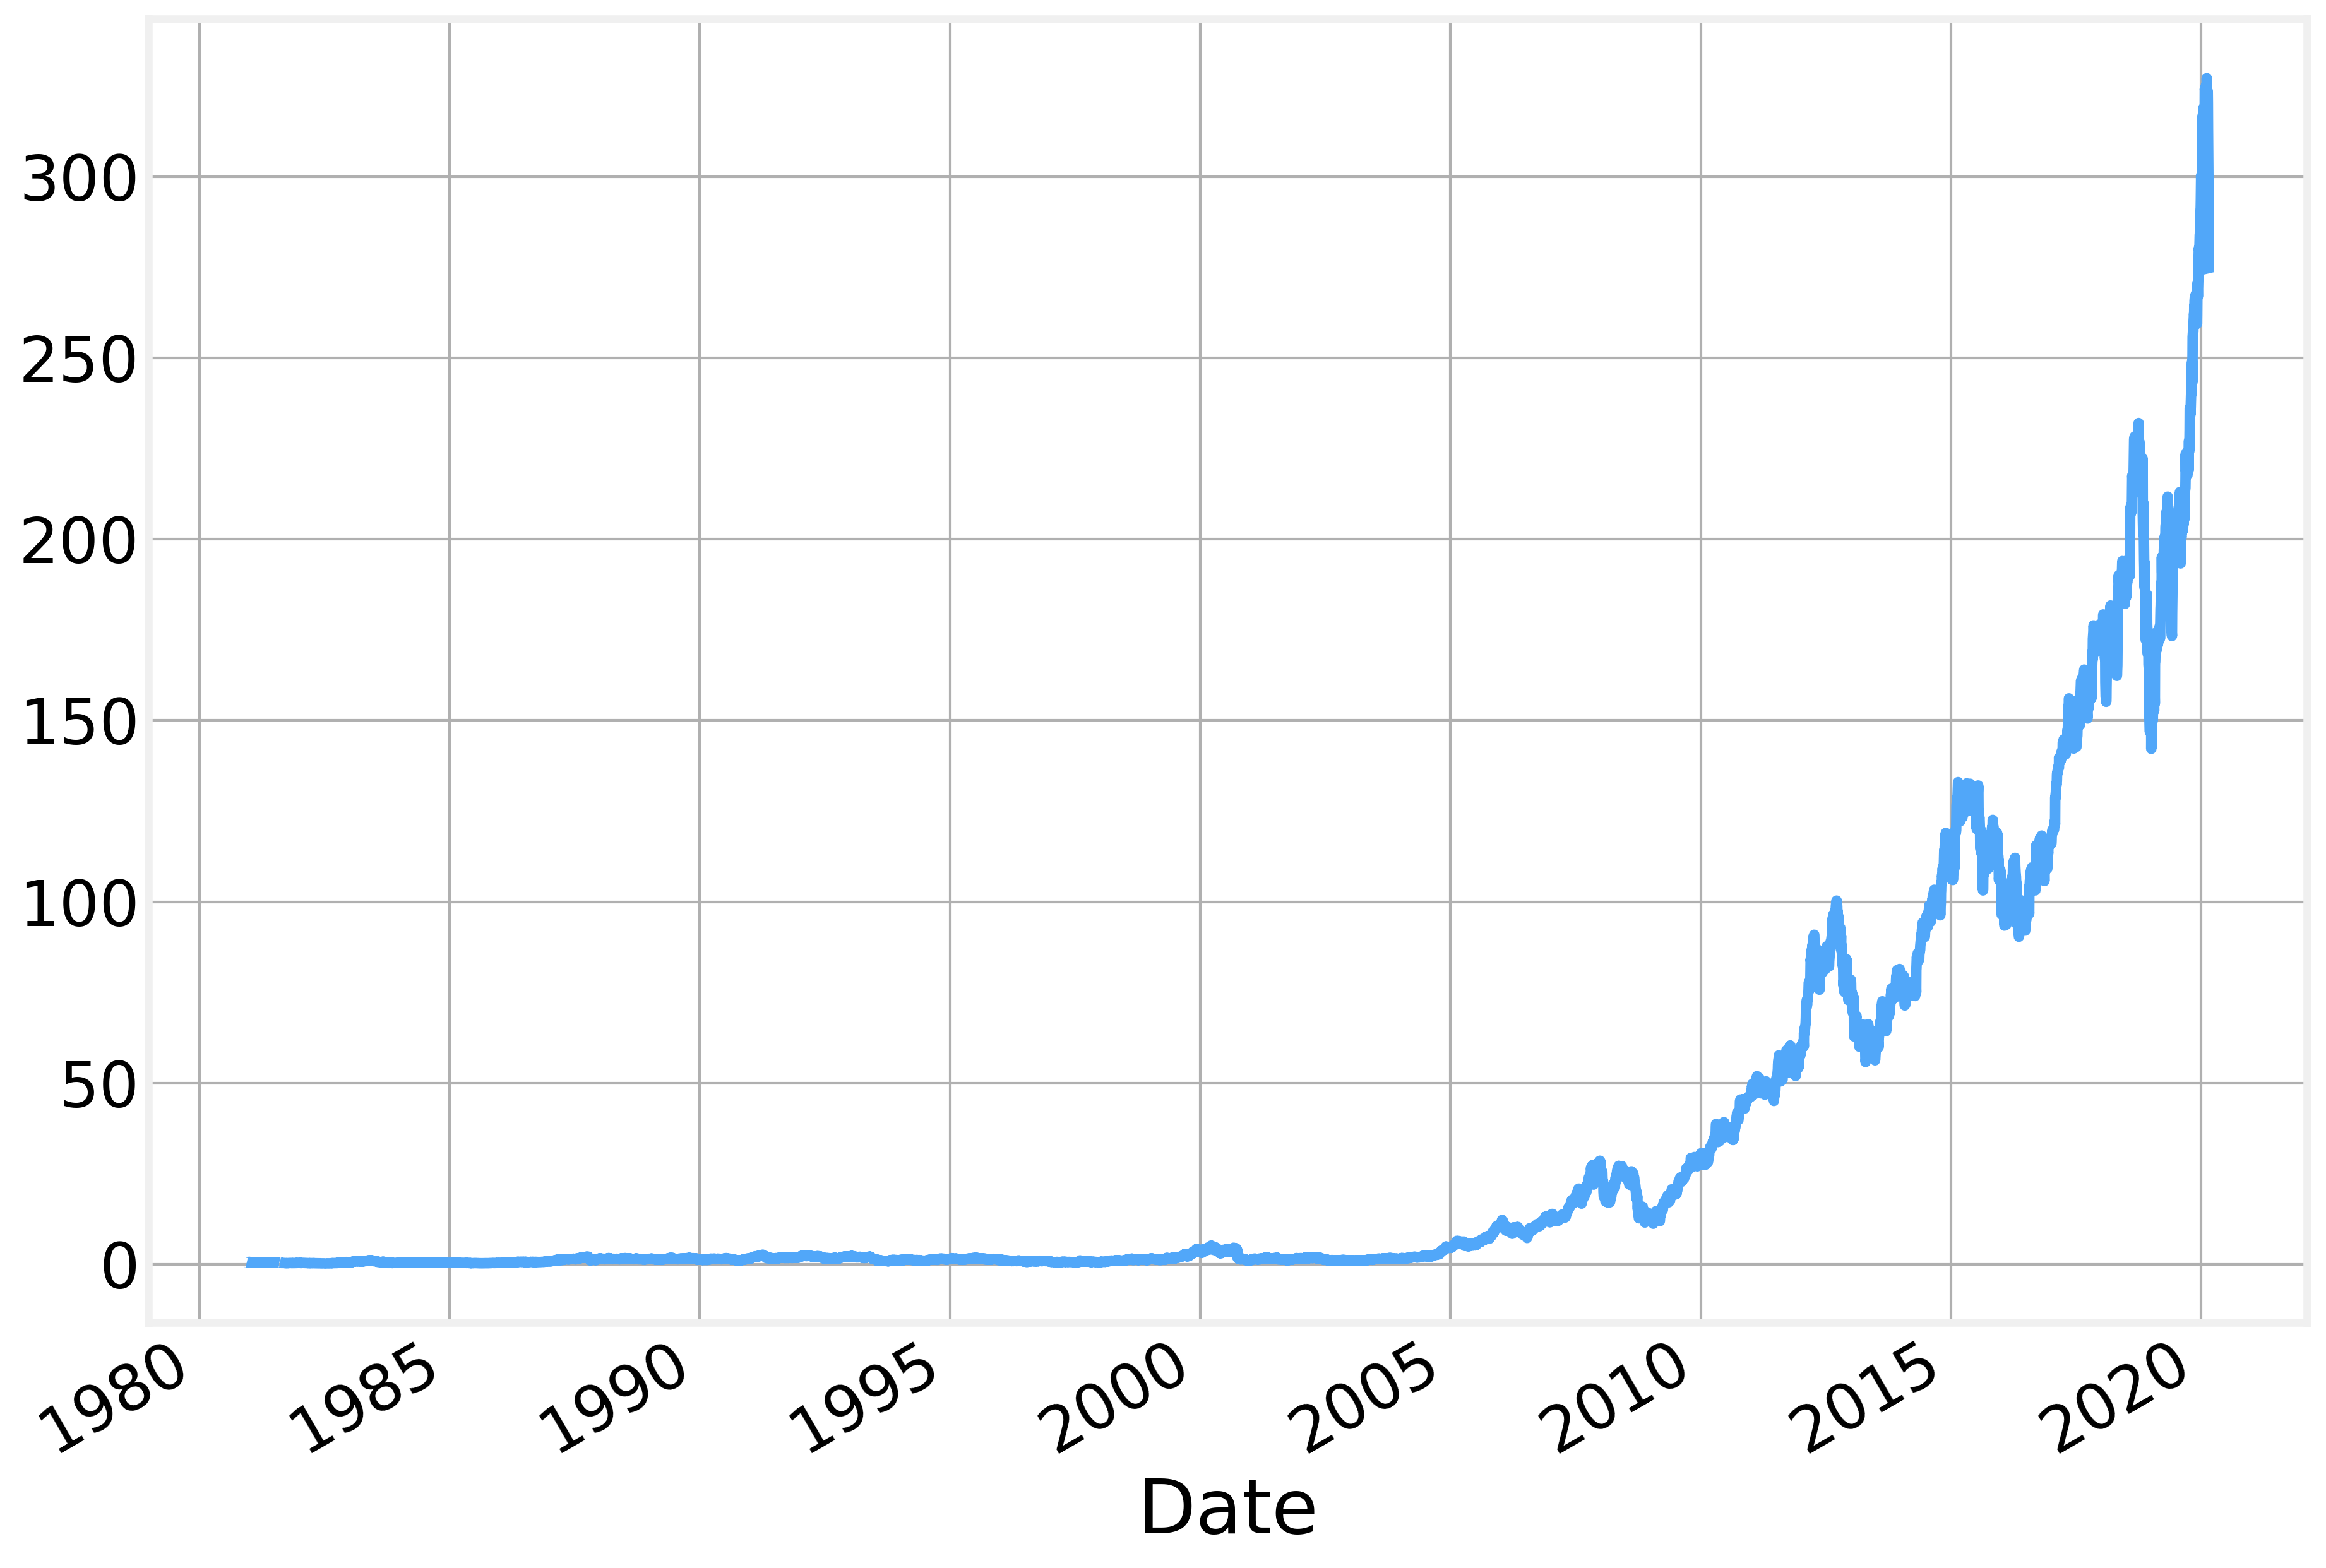

In [77]:
data['Close'].plot()

As before, we note that the last value is also included

## DataFrame Manipulations

We create a new DataFrame with some fake data

In [79]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})

In [80]:
df

,A,B
0,0,1
1,1,2
2,2,3


Map allows us to easily apply a function to the rows of a Series

In [81]:
df['A'].map(lambda x: x+1)

0    1
1    2
2    3
Name: A, dtype: int64

For a dataframe we need to use transform

In [83]:
df.transform(lambda x: x + 1)

,A,B
0,1,2
1,2,3
2,3,4


Or apply

In [87]:
df.apply(np.sum, axis=0)

A    3
B    6
dtype: int64

In [88]:
df.apply(np.sum, axis=1)

0    1
1    3
2    5
dtype: int64

In [89]:
data['year'] = data.index.year

groupby gives us a simple way to aggregate values based on the entries of a specific column to generate summary statistics, etc

In [90]:
data

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0,1980
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,1980
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,1980
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0,1980
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,1980
...,...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0,2020
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0,2020
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0,2020


In [91]:
data[['Volume', 'year']].groupby('year').sum()

,Volume
year,
1980,3.362128e+08
1981,2.049236e+09
1982,5.341252e+09
1983,1.112825e+10
1984,1.049476e+10
1985,1.137307e+10
1986,1.333081e+10
1987,1.494283e+10
1988,1.032324e+10


In [92]:
data['month'] = data.index.month

In [93]:
data

,Open,High,Low,Close,Adj Close,Volume,year,month
Date,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400.0,1980,12
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,1980,12
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,1980,12
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400.0,1980,12
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,1980,12
...,...,...,...,...,...,...,...,...
2020-02-24,297.260010,304.179993,289.230011,298.179993,298.179993,55548800.0,2020,2
2020-02-25,300.950012,302.529999,286.130005,288.079987,288.079987,57668400.0,2020,2
2020-02-26,286.529999,297.880005,286.500000,292.649994,292.649994,49513700.0,2020,2


## Pivot Tables

Pivot tables are a particularly powerful way to manipulate a DataFrame to generate summary tables of values. For example, we can easily slice our data to create time series of the average monthly value for each year in our dataset

In [107]:
pd.pivot_table(data[data['year']>=2010], index='month', columns="year", values='Open', aggfunc=np.mean)

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,,
1,29.915639,48.230928,61.251428,71.440476,76.871566,111.164000,98.706316,119.093499,174.021428,153.608571,311.170954
2,28.298872,50.047143,70.686143,65.500527,75.103007,125.023683,95.696000,133.234738,167.276316,171.392108,310.313684
3,31.828137,49.720124,82.408312,63.144501,76.227619,126.466365,103.816819,140.362174,175.047143,183.223810,NaN
4,35.857347,48.758572,87.086785,59.966688,77.154558,127.535239,106.785715,143.030001,169.765238,199.866665,NaN
5,35.997071,48.855170,80.826429,63.771558,85.900272,128.707501,94.958572,151.965908,184.956365,190.938636,NaN
6,37.483702,47.417728,82.094421,61.137429,91.912653,128.013636,96.588637,148.215001,188.720477,192.664498,NaN
7,36.497075,52.937928,85.658572,61.179610,95.729091,125.450455,98.450999,148.096500,190.196190,205.051817,NaN
8,35.944351,53.894347,91.646833,69.151364,98.149524,113.439524,107.463044,158.946958,212.486957,205.262274,NaN
9,38.977279,56.054217,97.445489,68.967500,100.618096,113.012381,110.673334,158.109000,222.331053,217.727499,NaN


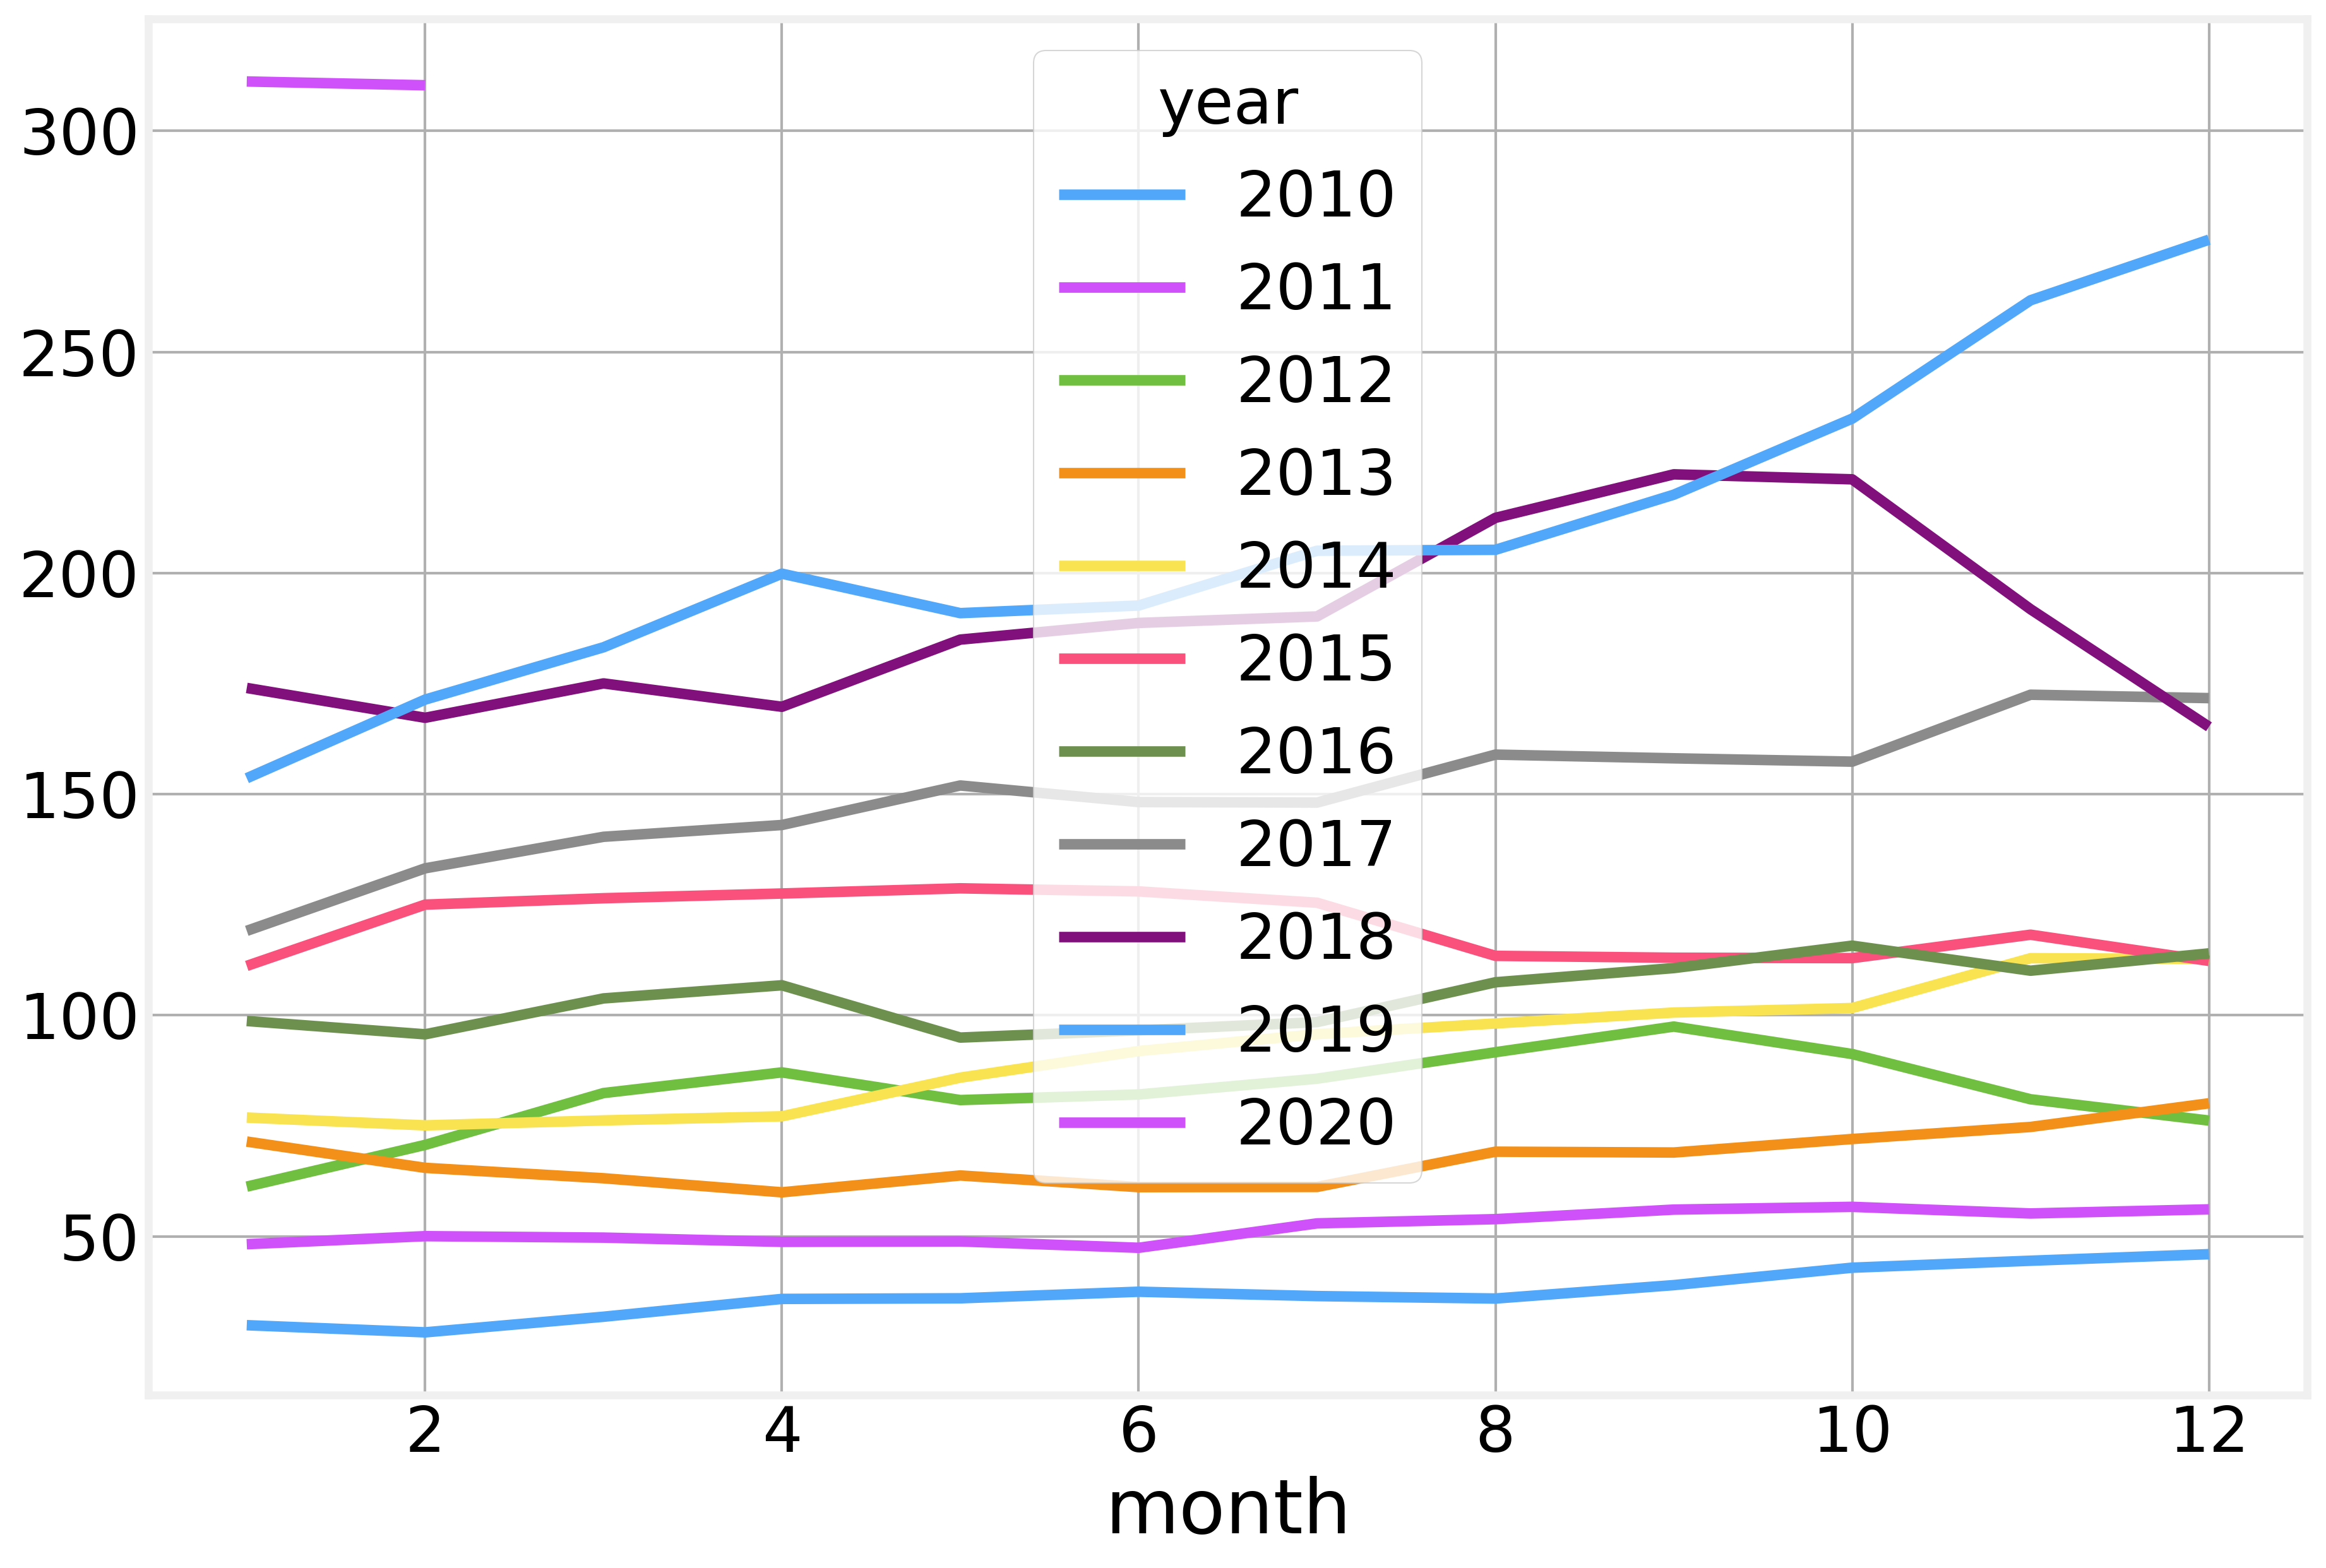

In [98]:
pd.pivot_table(data[data['year']>=2010], index='month', columns="year", values='Open', aggfunc=np.mean).plot()

## Merge and Join

Define 2 toy DataFrames

In [99]:
A = pd.DataFrame({"lkey":["foo", "bar", "baz", "foo"], "value":[1,2,3,4]})
B = pd.DataFrame({"rkey":["foo", "bar", "qux", "bar"], "value":[5,6,7,8]})

Merge allows us to join them by specifying an arbitrary column on each of them

In [100]:
A.merge(B, left_on="lkey", right_on="rkey", how="outer")

,lkey,value_x,rkey,value_y
0,foo,1.0,foo,5.0
1,foo,4.0,foo,5.0
2,bar,2.0,bar,6.0
3,bar,2.0,bar,8.0
4,baz,3.0,NaN,NaN
5,NaN,NaN,qux,7.0


On the other hand, join performs the join using the respective Indices

In [101]:
A.set_index('lkey', inplace=True)
B.set_index('rkey', inplace=True)

In [102]:
A.join(B, lsuffix="_l", rsuffix="_r", how="inner")

,value_l,value_r
bar,2,6
bar,2,8
foo,1,5
foo,4,5


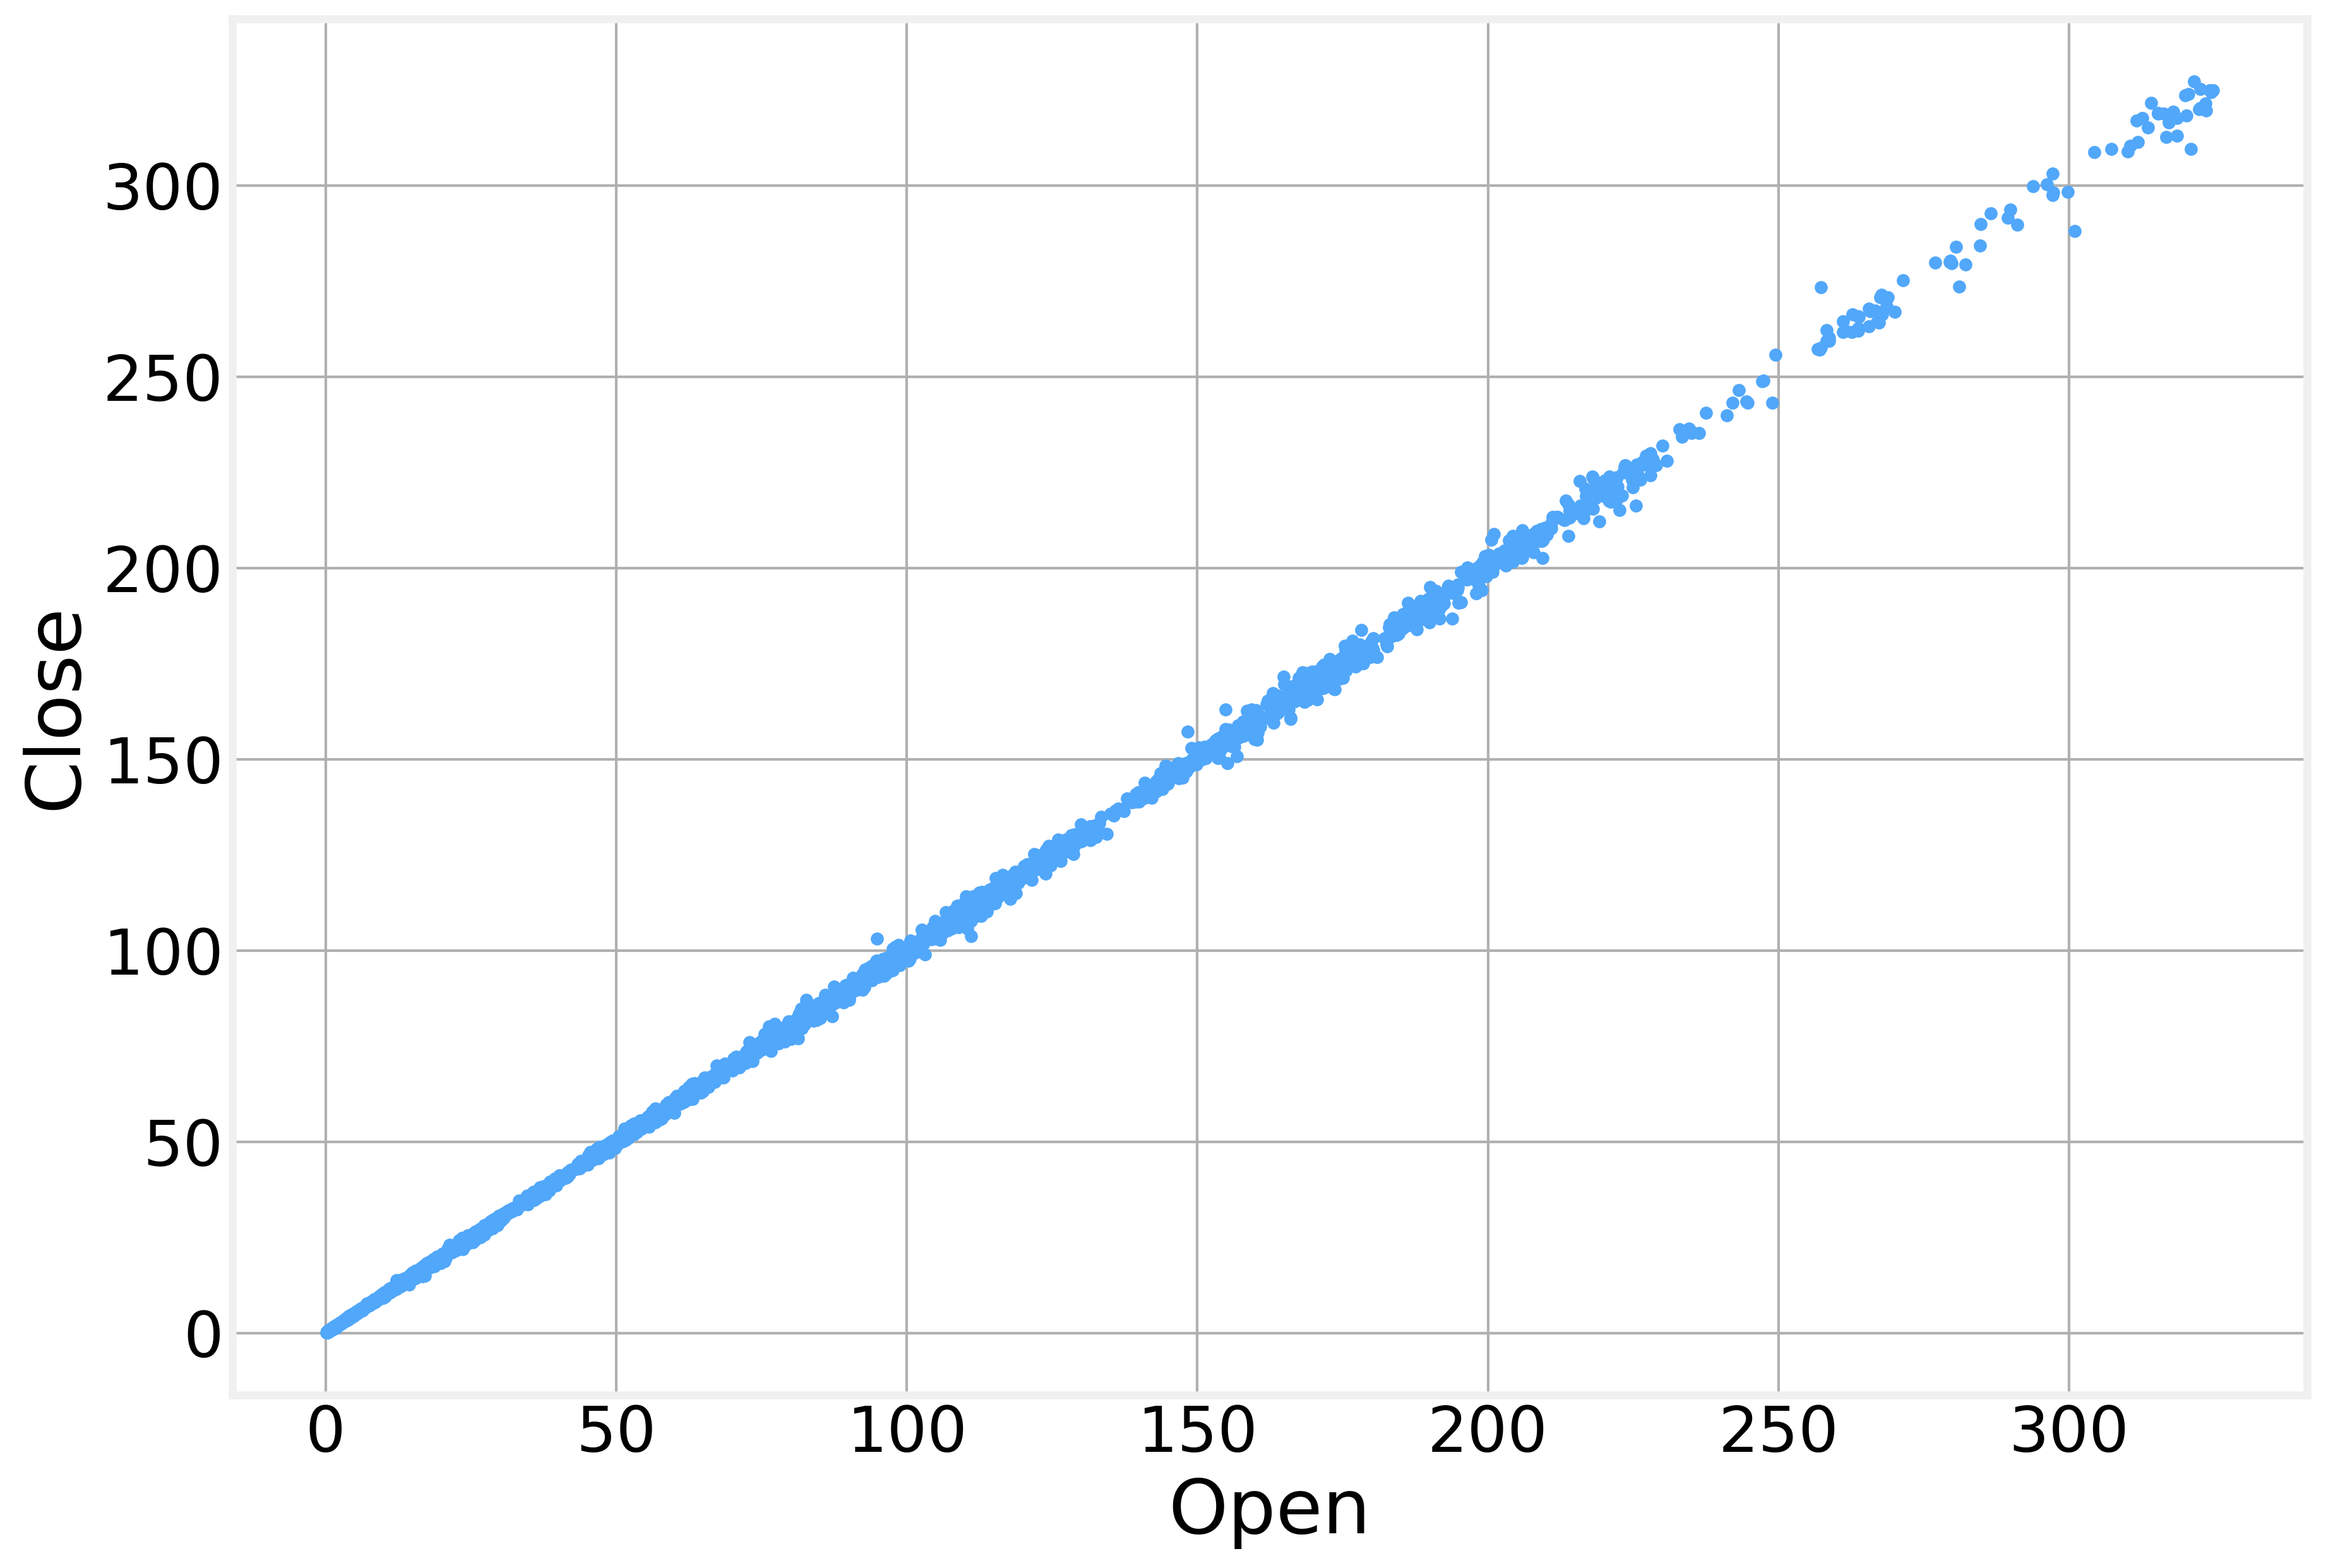

In [103]:
data.plot.scatter(x='Open', y='Close')

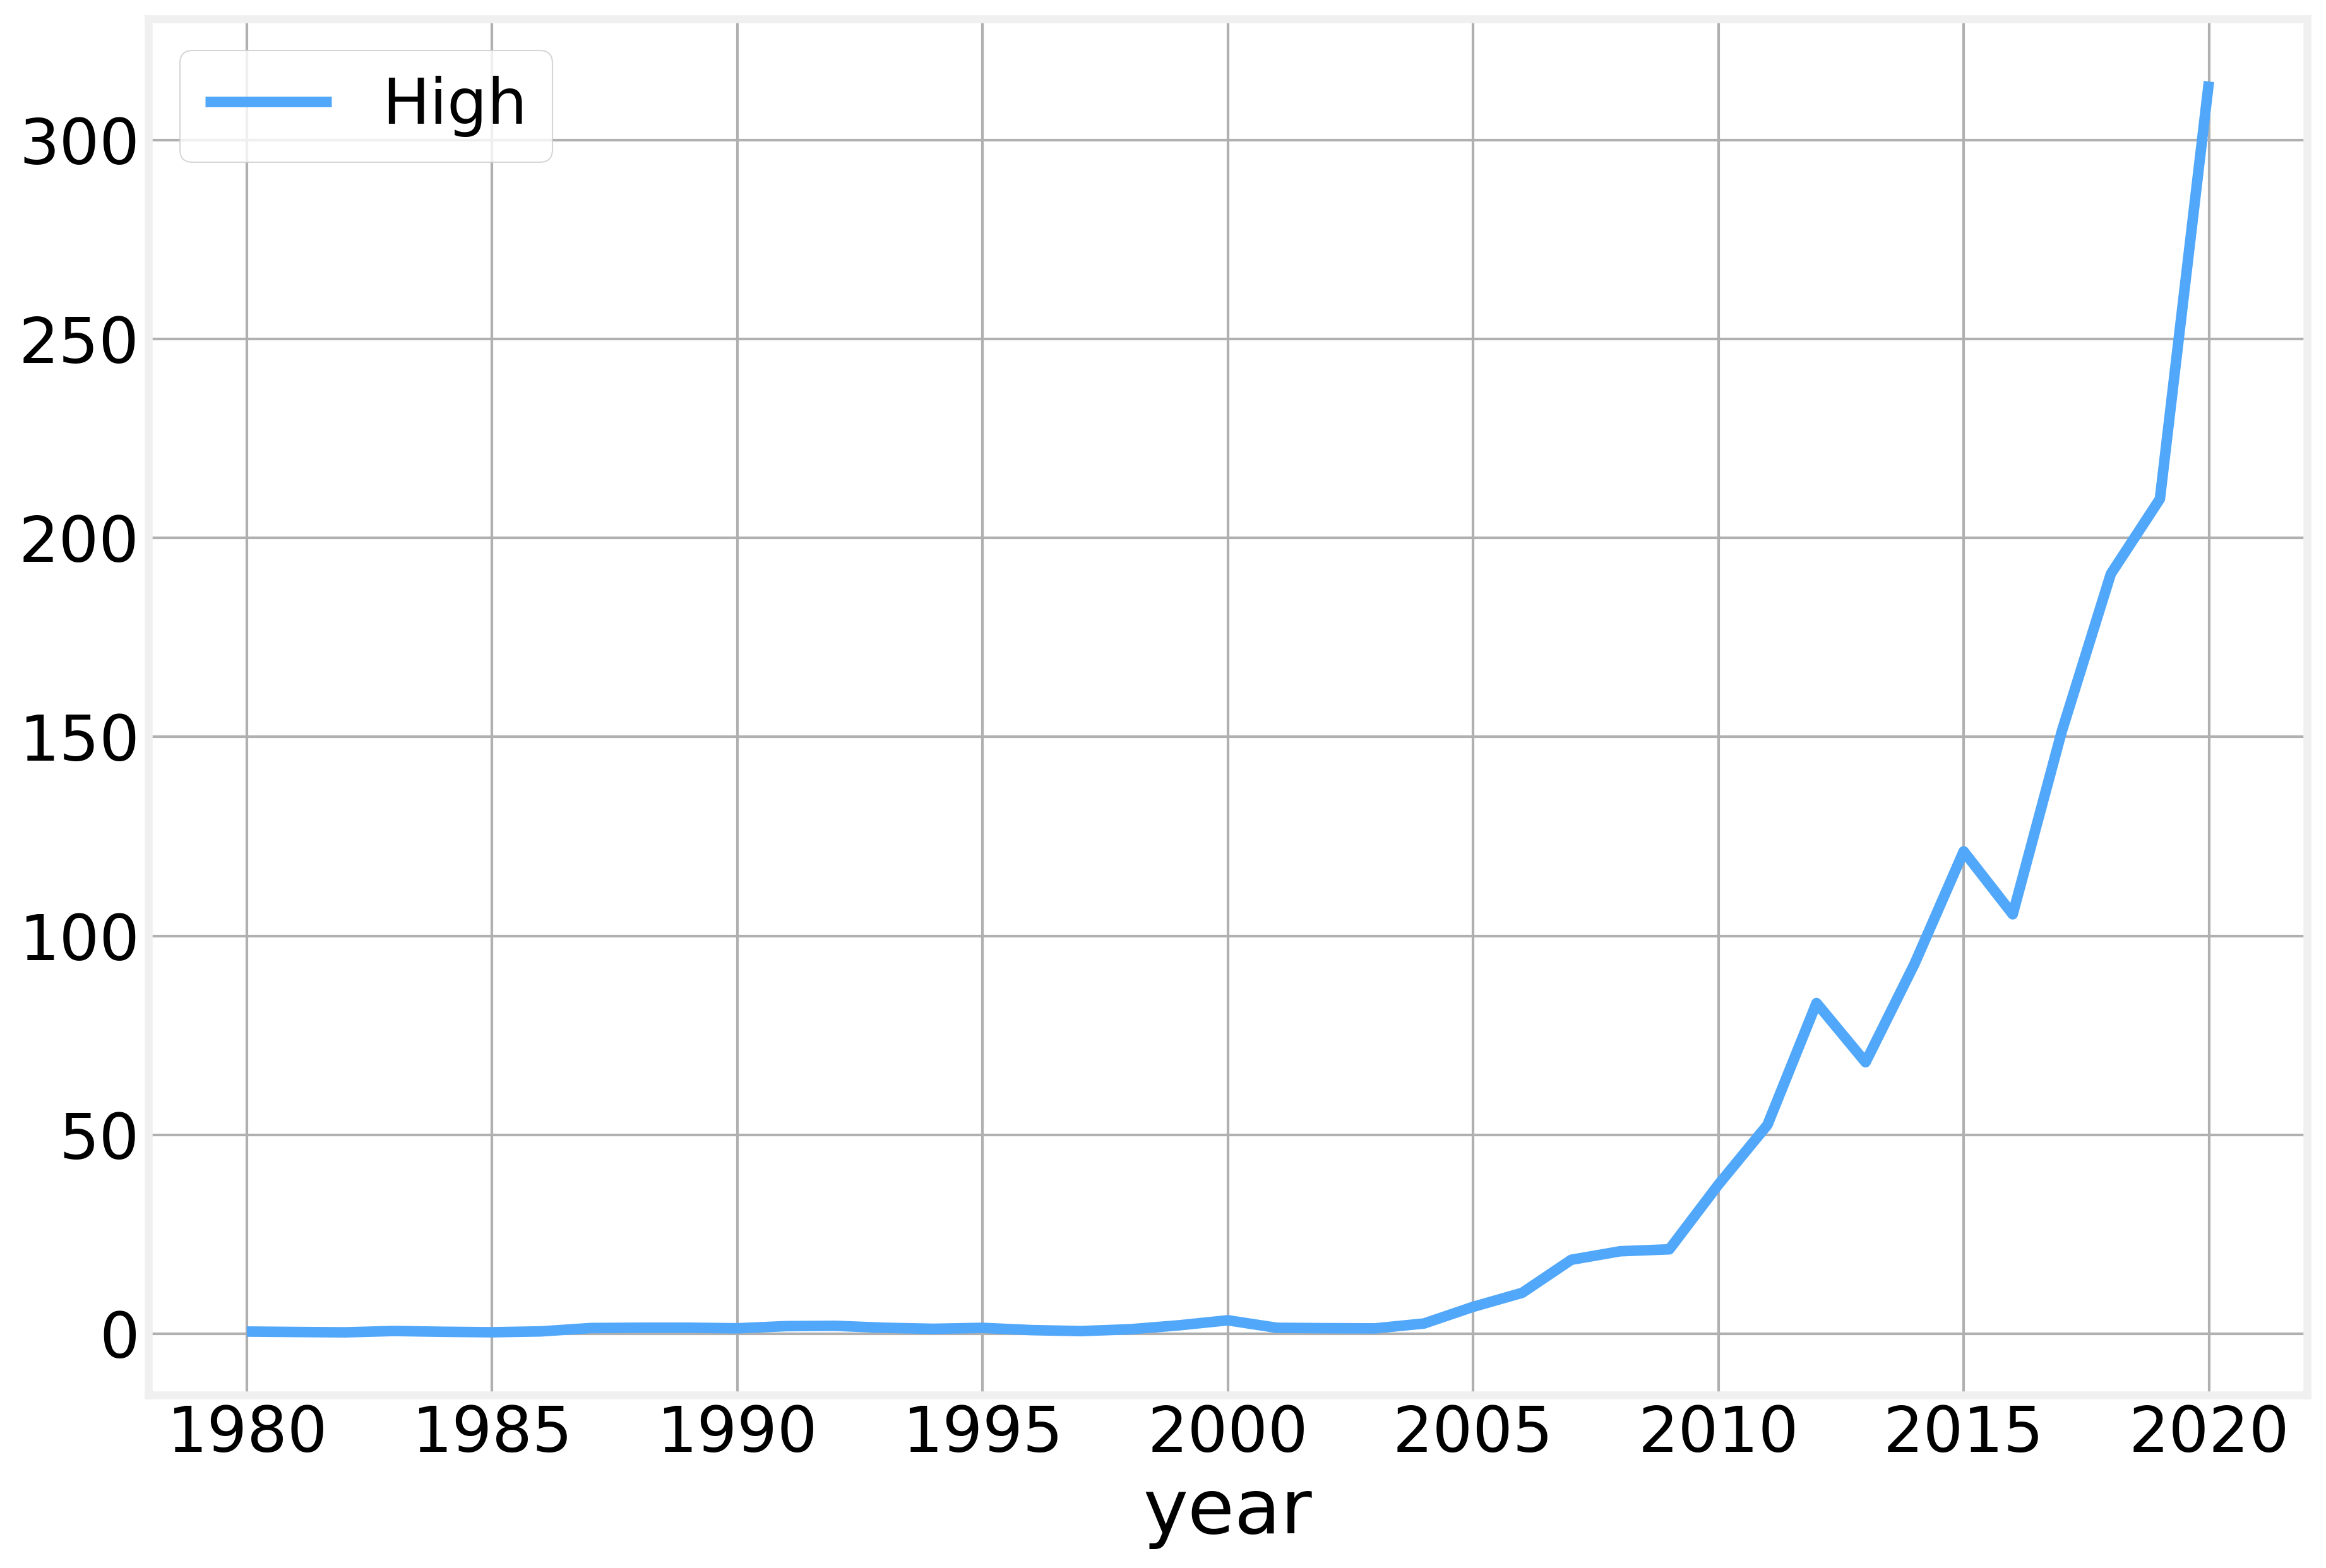

In [104]:
data.groupby('year').mean().plot(y='High')

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>